In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
# Step 1: Import the dataset
df = pd.read_csv("wine_clustering_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(f"Dataset Shape: {df.shape}")

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

Dataset Shape: (178, 13)


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# Step 4: Use describe() to get the summary statistics for each feature
df.describe()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


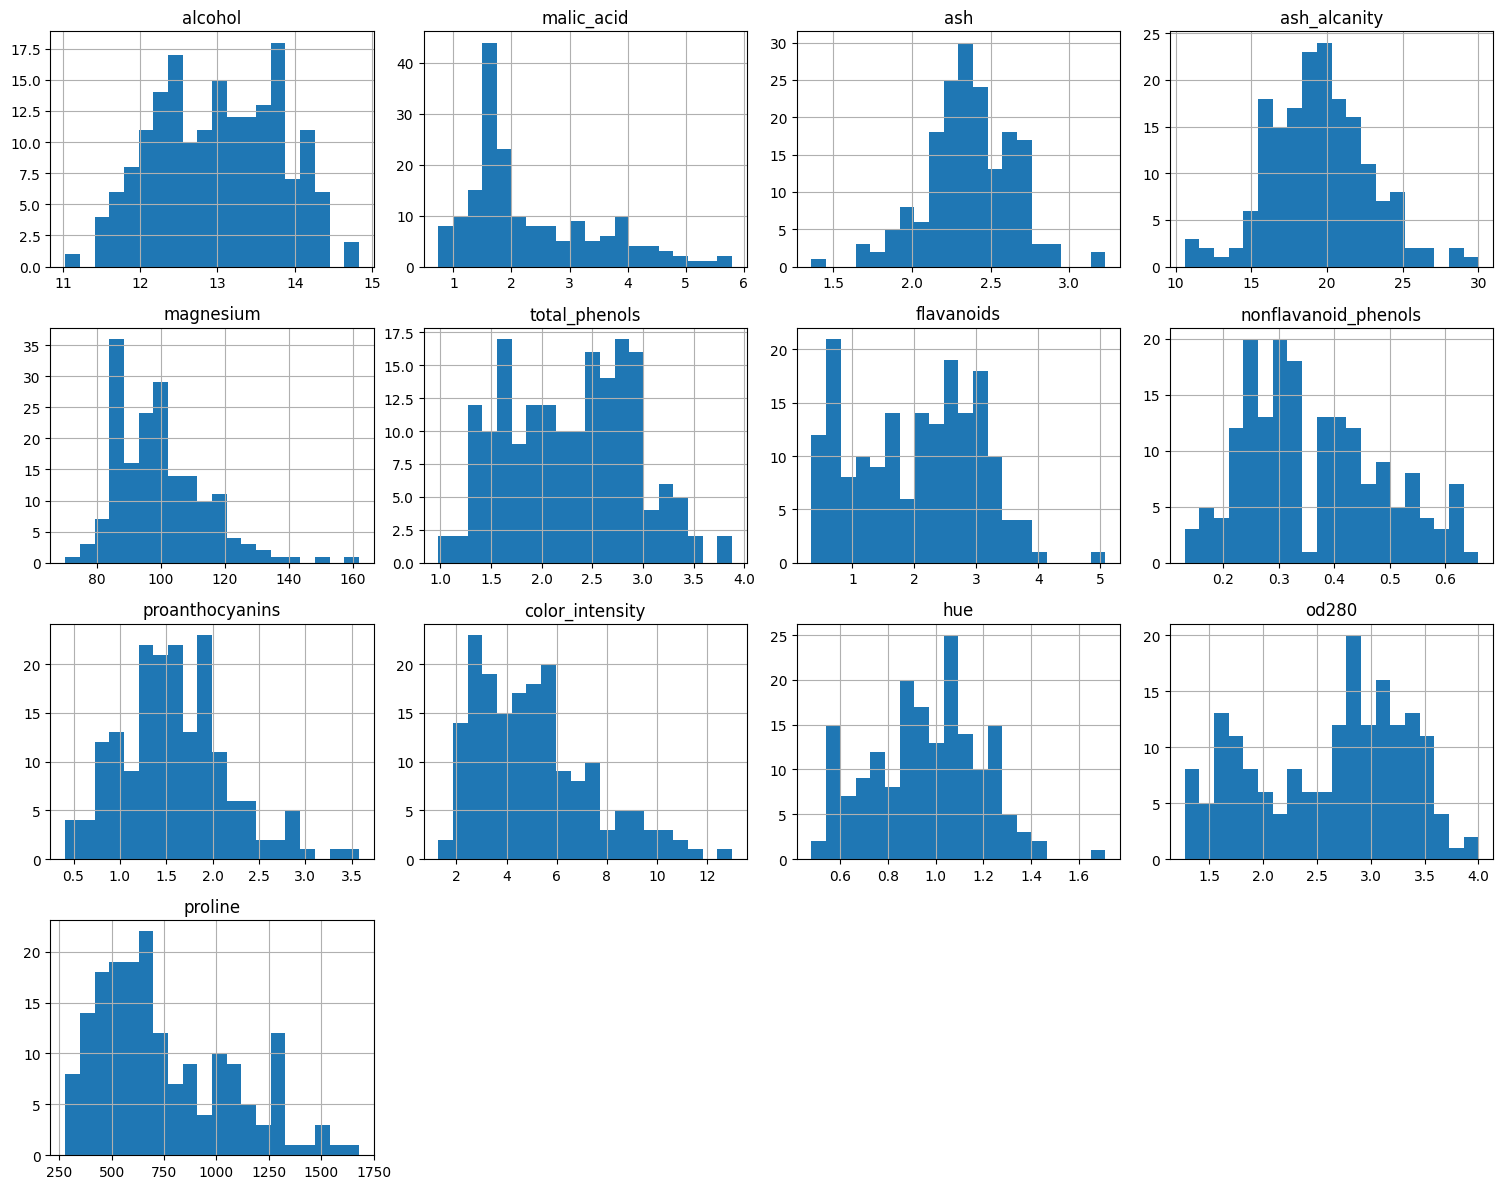

In [12]:
# Step 5: Visualize the distribution of each feature using histograms
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

In [13]:
# Step 1: Use StandardScaler to standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easier inspection
df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

# show few rows
df_scaled_df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [14]:
# Step 1: Apply DBSCAN clustering to the standardized data with eps=2 and min_samples=2
dbscan = DBSCAN(eps=2, min_samples=2)
clusters = dbscan.fit_predict(df_scaled)

In [15]:
# Step 2: Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# show few rows
df.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


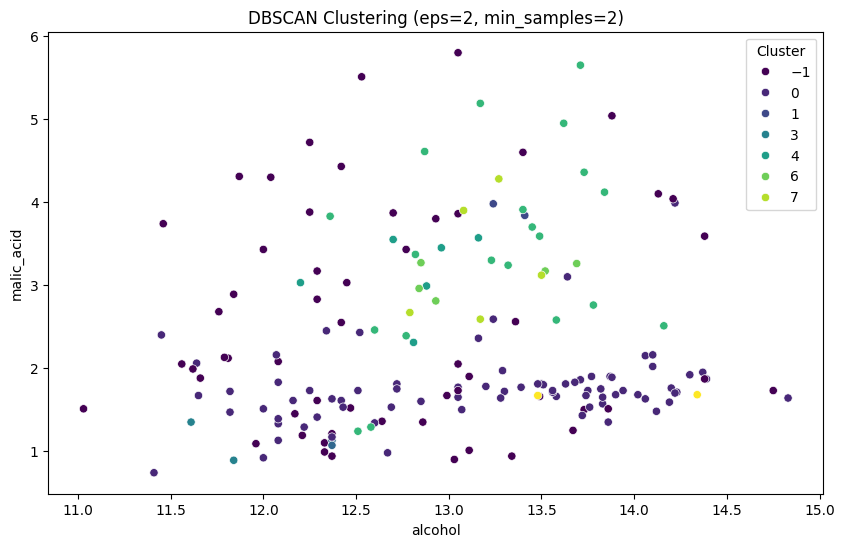

In [16]:
# Step 3: Visualize the clusters using a scatter plot for a pair of features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='malic_acid', hue='Cluster', palette='viridis')
plt.title('DBSCAN Clustering (eps=2, min_samples=2)')
plt.show()

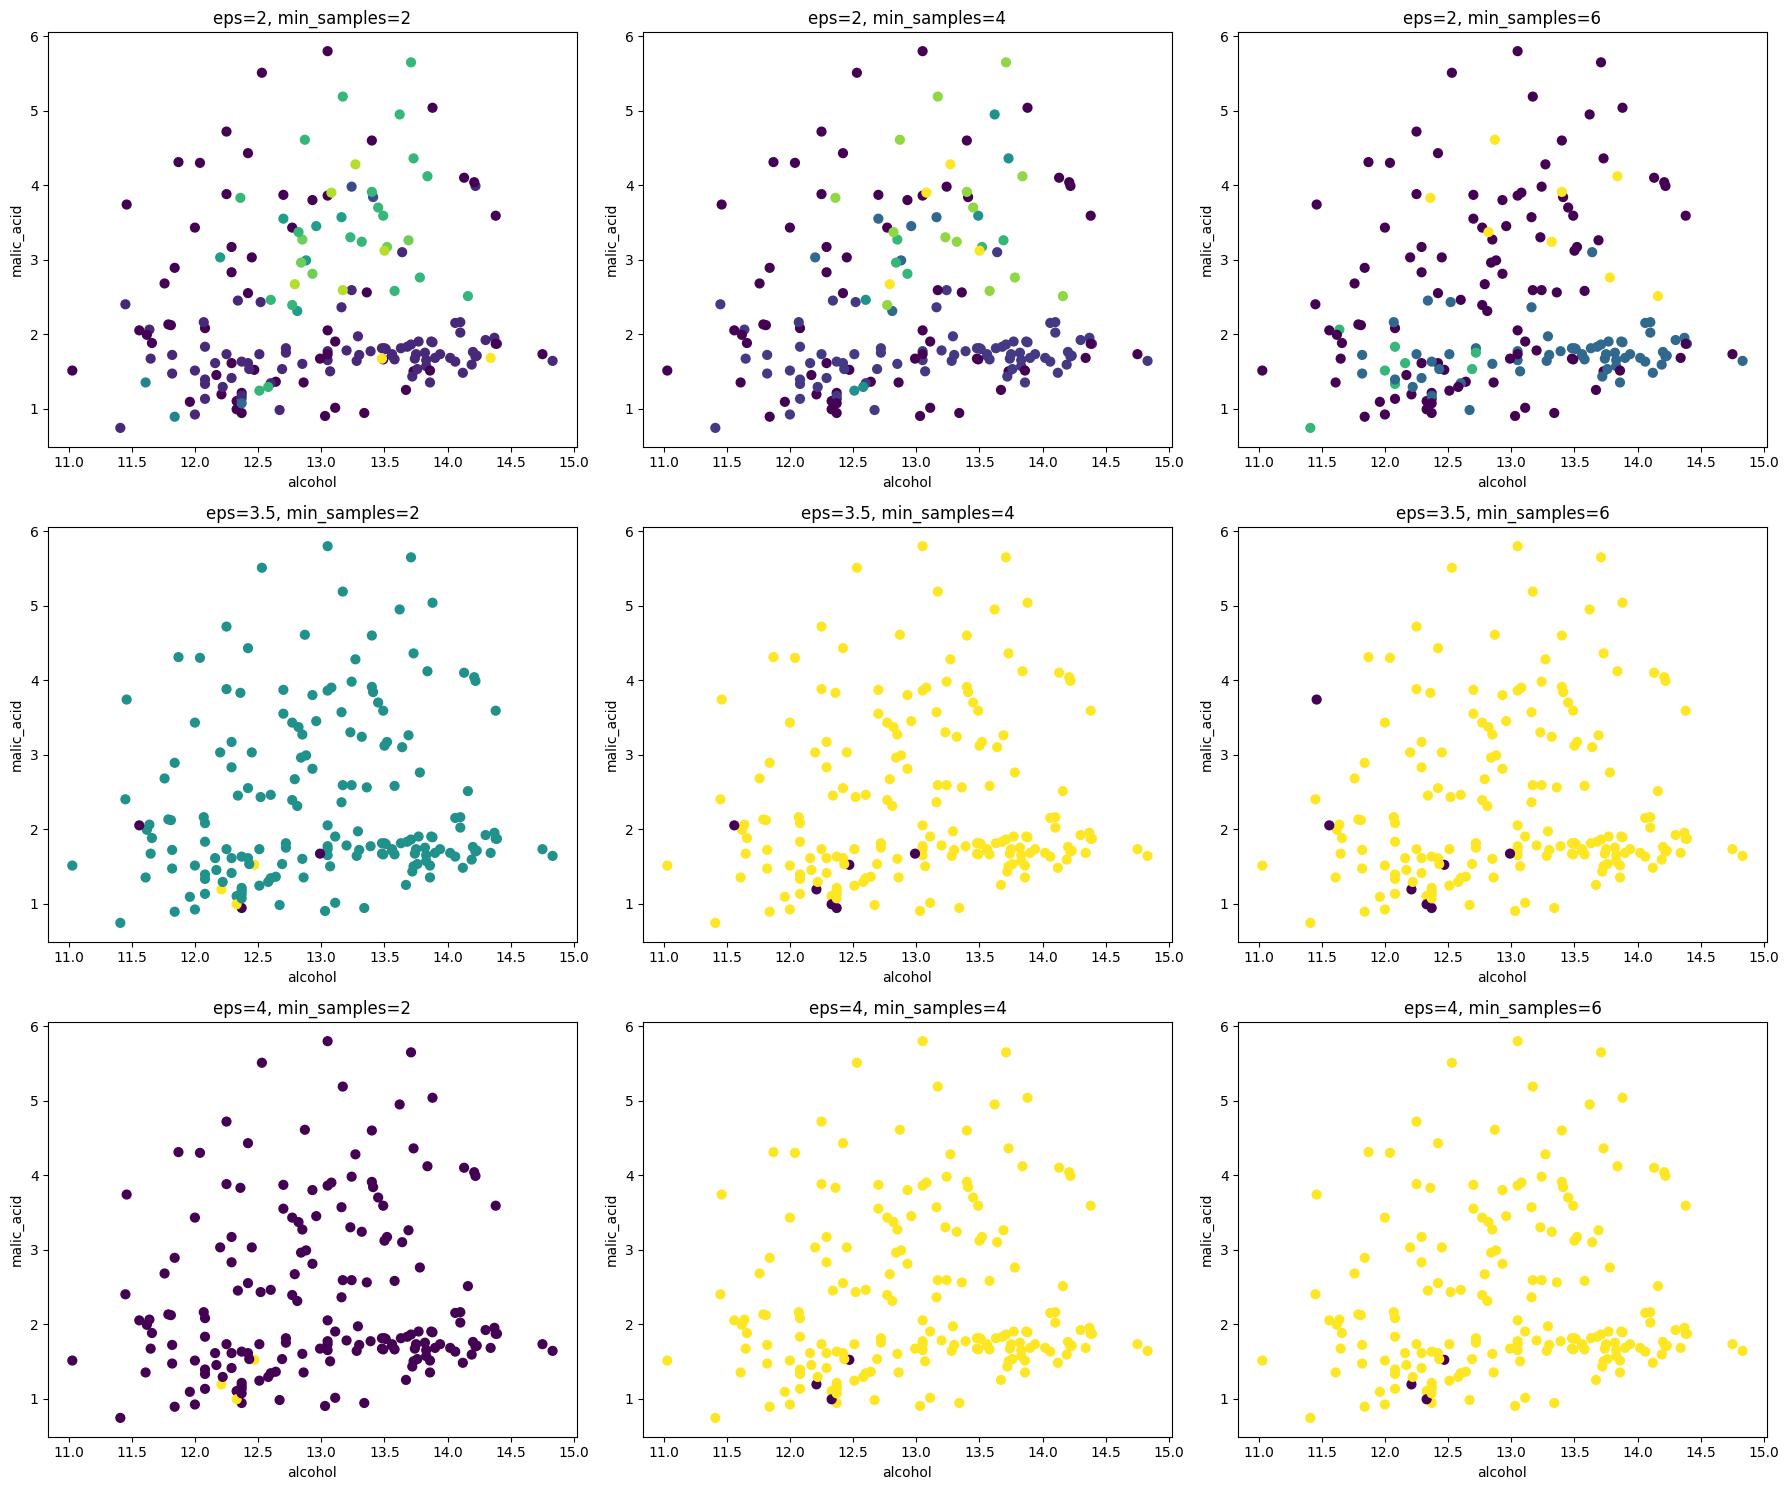

In [17]:
# Task 4: Parameter Tuning
# Experiment with different values of `eps` (2, 3.5, 4) and `min_samples` (2, 4, 6)

eps_values = [2, 3.5, 4]
min_samples_values = [2, 4, 6]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(18, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_scaled)
        
        # Plot
        axes[i, j].scatter(df['alcohol'], df['malic_acid'], c=labels, cmap='viridis', s=40)
        axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        axes[i, j].set_xlabel('alcohol')
        axes[i, j].set_ylabel('malic_acid')

plt.tight_layout()
plt.show()

In [18]:
import pickle

# 1. Train the final DBSCAN model (using best parameters from Task 4, e.g., eps=3.5)
final_dbscan = DBSCAN(eps=3.5, min_samples=4)
final_dbscan.fit(df_scaled)

# 2. Save the Scaler (essential for preprocessing new user input)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 3. Save the DBSCAN model
with open('dbscan_model.pkl', 'wb') as f:
    pickle.dump(final_dbscan, f)

print("Files 'scaler.pkl' and 'dbscan_model.pkl' have been generated!")

Files 'scaler.pkl' and 'dbscan_model.pkl' have been generated!
